# Import the dependencies

In [1]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *

Lambda = Abstraction
App = Application

# Defining test term:

In [2]:
# ω_n = λx.x...x, Ω_n = ω_n(I...I), I=λx.x, Φ_n = (λx.ω_n)Ω_nI

def i_term():
    """:return: I=λx.x"""
    x = Var()
    x_ = Atom(x)
    return Lambda(x, x_)


def omega_term(n: int):
    """:return: ω_n = λx.x...x"""
    x = Var()
    x_ = Atom(x)
    body_app_term = x_
    for _ in range(n - 1):
        body_app_term = App(body_app_term, x_)
    return Lambda(x, body_app_term)


def multi_i_term(m: int):
    """:return: (I...I)"""
    app_term = i_term()
    for _ in range(m - 1):
        app_term = App(app_term, i_term())
    return app_term


def omega_multi_i_term(n: int, m: int):
    """:return: Ω_n = ω_n(I...I)"""
    return App(omega_term(n), multi_i_term(m))


def fi_term(n: int):
    """:return: Φ_n = (λx.ω_n)Ω_nI"""
    x = Var()
    fi_term_value = Lambda(x, omega_term(n))
    return App(App(fi_term_value, omega_multi_i_term(n, n)), i_term())

In [3]:
print(fi_term(1).funky_str())
print(fi_term(2).funky_str())
print(fi_term(4).funky_str())
print(fi_term(6).funky_str())

(((λx.(λy.y)) ((λa.a) (λb.b))) (λc.c))
(((λx.(λy.(y y))) ((λa.(a a)) ((λb.b) (λc.c)))) (λd.d))
(((λx.(λy.(((y y) y) y))) ((λa.(((a a) a) a)) ((((λb.b) (λc.c)) (λd.d)) (λe.e)))) (λj.j))
(((λx.(λy.(((((y y) y) y) y) y))) ((λa.(((((a a) a) a) a) a)) ((((((λb.b) (λc.c)) (λd.d)) (λe.e)) (λj.j)) (λi.i)))) (λn.n))


In [3]:
n_set = (5, 10, 15, 20, 25, 30)
alpha_set = (-2, -1, -0.5, 1, 2)
r_set = (0.25, 0.5, 0.75)

# Drawing stuff

In [4]:
import matplotlib.pyplot as plt


def draw_mult_lines_color(comp_data: dict, title="title", x_label="x_label", y_label="y_label"):
    for key in comp_data.keys():
        plt.plot(
            range(2, len(comp_data[key][0]) + 2),
            comp_data[key][0],
            linestyle=comp_data[key][1],
            color=comp_data[key][2] if len(comp_data[key]) > 2 else None,
            label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()

# Comparison of the number of reduction steps for LI- and LO-strategies

### LO strategy, Ω_n = ω_n(I...I) term

In [6]:
lo_omega_steps = []
strategy = LOStrategy()
for n in tqdm(n_set):
    term = omega_multi_i_term(n, n)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    lo_omega_steps.append(norm_steps)

print(lo_omega_steps)

100%|██████████| 6/6 [00:23<00:00,  3.95s/it]

[25, 100, 225, 400, 625, 900]


### LI strategy, Ω_n = ω_n(I…I) term

In [7]:
li_omega_steps = []
strategy = LIStrategy()
for n in tqdm(n_set):
    term = omega_multi_i_term(n, n)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    li_omega_steps.append(norm_steps)

print(li_omega_steps)

100%|██████████| 6/6 [00:00<00:00, 76.55it/s]

[9, 19, 29, 39, 49, 59]


### LO strategy, Φ_n = (λx.ω_n)Ω_nI

In [8]:
lo_fi_steps = []
strategy = LOStrategy()
for n in tqdm(n_set):
    term = fi_term(n)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    lo_fi_steps.append(norm_steps)

print(lo_fi_steps)

100%|██████████| 6/6 [00:00<00:00, 171.38it/s]

[6, 11, 16, 21, 26, 31]


### LI strategy, Φ_n = (λx.ω_n)Ω_nI

In [9]:
li_fi_steps = []
strategy = LIStrategy()
for n in tqdm(n_set):
    term = fi_term(n)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    li_fi_steps.append(norm_steps)

print(li_fi_steps)

100%|██████████| 6/6 [00:00<00:00, 35.49it/s]

[15, 30, 45, 60, 75, 90]


# Comparison of the number of reduction steps for the generalised strategy

### general Ω_n = ω_n(I…I) term

In [10]:
general_omega_steps = dict()

for alpha in alpha_set:
    strategy = GeneralRandomStrategy(prob_norm=f"pow_{alpha}")
    count_tries = 20
    general_omega_steps[alpha] = []
    for n in tqdm(n_set):
        total_steps = 0
        term = omega_multi_i_term(n, n)
        for _ in range(count_tries):
            _, norm_steps = term.normalize(strategy, is_limited=False)
            total_steps += norm_steps
        general_omega_steps[alpha].append(total_steps / count_tries)

100%|██████████| 6/6 [00:23<00:00,  3.95s/it]


In [11]:
print(general_omega_steps)

{-2: [25.0, 100.0, 225.0, 400.0, 625.0, 900.0], -1: [24.0, 99.1, 222.9, 399.05, 623.8, 894.2], -0.5: [23.2, 97.75, 220.8, 397.15, 625.0, 897.1], 1: [14.6, 58.6, 141.7, 199.55, 299.8, 356.25], 2: [11.8, 27.55, 48.6, 62.75, 115.0, 130.05]}


### general Φ_n = (λx.ω_n)Ω_nI

In [12]:
general_fi_steps = dict()

for alpha in alpha_set:
    strategy = GeneralRandomStrategy(prob_norm=f"pow_{alpha}")
    count_tries = 20
    general_fi_steps[alpha] = []
    for n in tqdm(n_set):
        total_steps = 0
        term = fi_term(n)
        for _ in range(count_tries):
            _, norm_steps = term.normalize(strategy, is_limited=False)
            total_steps += norm_steps
        general_fi_steps[alpha].append(total_steps / count_tries)

100%|██████████| 6/6 [04:01<00:00, 40.25s/it]


In [13]:
print(general_fi_steps)

{-2: [6.6, 11.65, 16.4, 21.6, 26.5, 31.3], -1: [6.45, 11.8, 17.9, 21.7, 27.0, 32.4], -0.5: [7.95, 13.65, 19.35, 24.4, 30.85, 35.05], 1: [13.45, 35.75, 78.4, 105.8, 204.55, 208.85], 2: [16.45, 54.05, 99.35, 146.7, 290.0, 355.45]}


# Comparison of the number of reduction steps for the mixed strategy

### Mixed Ω_n = ω_n(I…I) term

In [5]:
mixed_omega_steps = dict()

for r in r_set:
    strategy = MixedStrategy([LOStrategy(), LIStrategy()], [r, 1.0 - r])
    count_tries = 20
    mixed_omega_steps[r] = []
    for n in tqdm(n_set):
        total_steps = 0
        term = omega_multi_i_term(n, n)
        for _ in range(count_tries):
            _, norm_steps = term.normalize(strategy, is_limited=False)
            total_steps += norm_steps
        mixed_omega_steps[r].append(total_steps / count_tries)

100%|██████████| 6/6 [08:01<00:00, 80.30s/it] 


In [6]:
print(mixed_omega_steps)

{0.25: [15.8, 73.0, 169.7, 337.3, 562.6, 843.45], 0.5: [21.2, 93.7, 207.5, 381.0, 596.2, 876.8], 0.75: [22.0, 96.4, 218.7, 392.4, 619.0, 888.4]}


### Mixed Φ_n = (λx.ω_n)Ω_nI

In [7]:
mixed_fi_steps = dict()

for r in r_set:
    strategy = MixedStrategy([LOStrategy(), LIStrategy()], [r, 1.0 - r])
    count_tries = 20
    mixed_fi_steps[r] = []
    for n in tqdm(n_set):
        total_steps = 0
        term = fi_term(n)
        for _ in range(count_tries):
            _, norm_steps = term.normalize(strategy, is_limited=False)
            total_steps += norm_steps
        mixed_fi_steps[r].append(total_steps / count_tries)

100%|██████████| 6/6 [00:00<00:00,  8.00it/s]


In [8]:
print(mixed_fi_steps)

{0.25: [7.85, 13.05, 18.3, 24.5, 27.8, 32.65], 0.5: [7.4, 11.95, 16.9, 22.05, 26.65, 32.2], 0.75: [6.5, 11.55, 16.2, 21.35, 26.15, 31.25]}


# Total Results

In [9]:
lo_omega_steps = [25, 100, 225, 400, 625, 900]
li_omega_steps = [9, 19, 29, 39, 49, 59]

lo_fi_steps = [6, 11, 16, 21, 26, 31]
li_fi_steps = [15, 30, 45, 60, 75, 90]

general_omega_steps = {
    -2: [25.0, 100.0, 225.0, 400.0, 625.0, 900.0],
    -1: [24.0, 99.1, 222.9, 399.05, 623.8, 894.2],
    -0.5: [23.2, 97.75, 220.8, 397.15, 625.0, 897.1],
    1: [14.6, 58.6, 141.7, 199.55, 299.8, 356.25],
    2: [11.8, 27.55, 48.6, 62.75, 115.0, 130.05],
}
general_fi_steps = {
    -2: [6.6, 11.65, 16.4, 21.6, 26.5, 31.3],
    -1: [6.45, 11.8, 17.9, 21.7, 27.0, 32.4],
    -0.5: [7.95, 13.65, 19.35, 24.4, 30.85, 35.05],
    1: [13.45, 35.75, 78.4, 105.8, 204.55, 208.85],
    2: [16.45, 54.05, 99.35, 146.7, 290.0, 355.45],
}

mixed_omega_steps = {
    0.25: [15.8, 73.0, 169.7, 337.3, 562.6, 843.45],
    0.5: [21.2, 93.7, 207.5, 381.0, 596.2, 876.8],
    0.75: [22.0, 96.4, 218.7, 392.4, 619.0, 888.4],
}
mixed_fi_steps = {
    0.25: [7.85, 13.05, 18.3, 24.5, 27.8, 32.65],
    0.5: [7.4, 11.95, 16.9, 22.05, 26.65, 32.2],
    0.75: [6.5, 11.55, 16.2, 21.35, 26.15, 31.25],
}

# Draw graphics

In [ ]:
# Ω_n = ω_n(I…I) term
# Φ_n = (λx.ω_n)Ω_nI

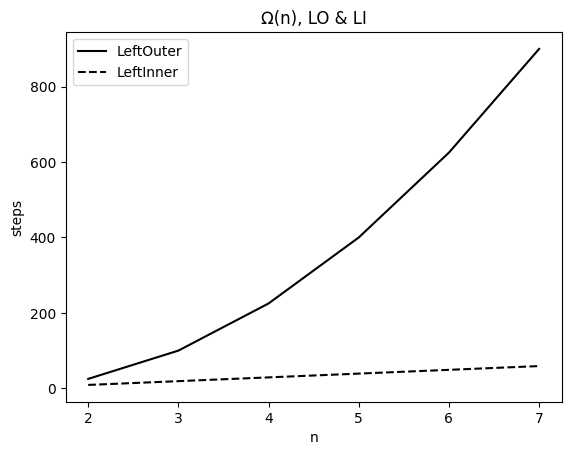

In [14]:
context = {
    "LeftOuter": (lo_omega_steps, "-", "black"),
    "LeftInner": (li_omega_steps, "--", "black"),
}

draw_mult_lines_color(comp_data=context, title="Ω(n), LO & LI", x_label="n", y_label="steps")

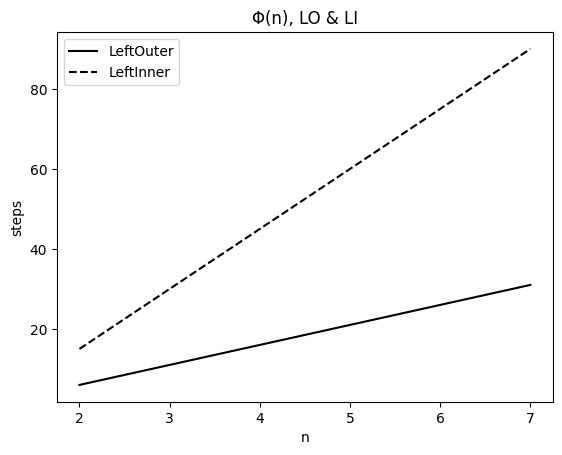

In [15]:
context = {
    "LeftOuter": (lo_fi_steps, "-", "black"),
    "LeftInner": (li_fi_steps, "--", "black"),
}

draw_mult_lines_color(comp_data=context, title="Φ(n), LO & LI", x_label="n", y_label="steps")

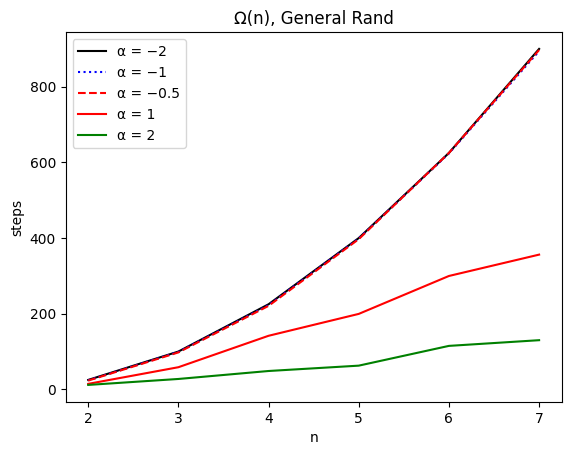

In [22]:
context = {
    "α = −2": (general_omega_steps[-2], "-", "black"),
    "α = −1": (general_omega_steps[-1], ":", "blue"),
    "α = −0.5": (general_omega_steps[-0.5], "--", "red"),
    "α = 1": (general_omega_steps[1], "-", "red"),
    "α = 2": (general_omega_steps[2], "-", "green"),
}

draw_mult_lines_color(comp_data=context, title="Ω(n), General Rand", x_label="n", y_label="steps")

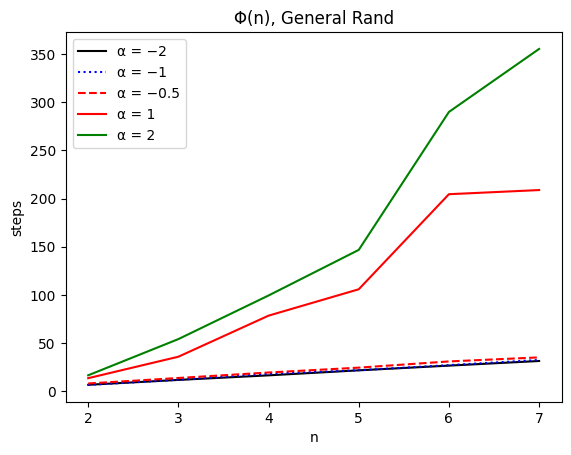

In [23]:
context = {
    "α = −2": (general_fi_steps[-2], "-", "black"),
    "α = −1": (general_fi_steps[-1], ":", "blue"),
    "α = −0.5": (general_fi_steps[-0.5], "--", "red"),
    "α = 1": (general_fi_steps[1], "-", "red"),
    "α = 2": (general_fi_steps[2], "-", "green"),
}

draw_mult_lines_color(comp_data=context, title="Φ(n), General Rand", x_label="n", y_label="steps")

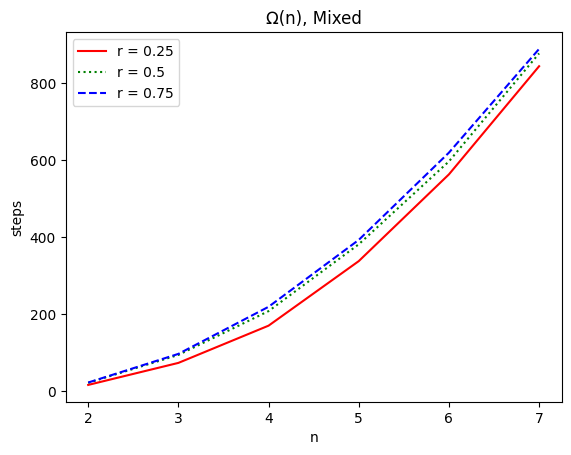

In [25]:
context = {
    "r = 0.25": (mixed_omega_steps[0.25], "-", "red"),
    "r = 0.5": (mixed_omega_steps[0.5], ":", "green"),
    "r = 0.75": (mixed_omega_steps[0.75], "--", "blue"),
}

draw_mult_lines_color(comp_data=context, title="Ω(n), Mixed", x_label="n", y_label="steps")

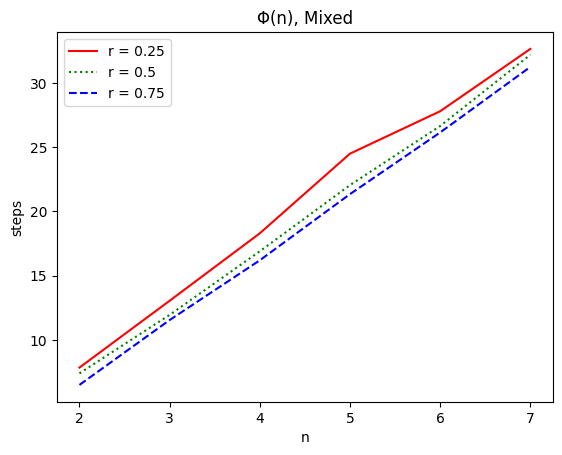

In [26]:
context = {
    "r = 0.25": (mixed_fi_steps[0.25], "-", "red"),
    "r = 0.5": (mixed_fi_steps[0.5], ":", "green"),
    "r = 0.75": (mixed_fi_steps[0.75], "--", "blue"),
}

draw_mult_lines_color(comp_data=context, title="Φ(n), Mixed", x_label="n", y_label="steps")